In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Path ke folder utama di Google Drive
drive_path = '/content/drive/My Drive/'
main_folder = 'data_sortir_split'

In [4]:
# Path ke folder train, val, dan test
train_folder = os.path.join(drive_path, main_folder, 'train')
val_folder = os.path.join(drive_path, main_folder, 'val')
test_folder = os.path.join(drive_path, main_folder, 'test')

# Tampilkan isi folder
print(f"Isi folder 'train': {os.listdir(train_folder)}")
print(f"Isi folder 'val': {os.listdir(val_folder)}")
print(f"Isi folder 'test': {os.listdir(test_folder)}")

Isi folder 'train': ['Cassava___green_mottle', 'Cassava___mosaic_disease', 'Cassava___bacterial_blight', 'Cassava___healthy', 'Cassava___brown_streak_disease', 'Pythium Fruit Rot', 'Gummy Stem Blight', 'Fresh Leaf', 'Fresh Cucumber', 'Downy Mildew', 'Belly Rot', 'Bacterial Wilt', 'Anthracnose', 'Phytopthora', 'Healthy', 'Pest', 'Fungi', 'Virus', 'Nematode', 'Bacteria', 'Wilt Disease', 'Insect Pest Disease', 'Leaf Spot Disease', 'White Mold Disease', 'Healthy Leaf', 'Mosaic Virus Disease', 'Powdery_Mildew', 'Mosaic Disease', 'Bacterial Leaf Spot', 'LeafCurl', 'Yelowwiss', 'DaunSehat', 'Karat_Daun', 'Daun_Sehat', 'Bercak_Daun', 'Hawar_Daun', 'Insect Hole', 'Black Rot', 'Tomato___Leaf_Mold', 'Tomato___Late_blight', 'Tomato___healthy', 'Tomato___Target_Spot', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Bacterial_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'BrownSpot', 'Tungro', 'Blas

In [5]:
from tensorflow.keras.applications.resnet50 import preprocess_input

# Data augmentation untuk training
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Preprocessing untuk validasi dan testing
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Ukuran batch dan target size
batch_size = 16
target_size = (224, 224)  # ResNet50 memerlukan 224x224

# Generator data
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator = val_datagen.flow_from_directory(
    val_folder,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 2192 images belonging to 52 classes.
Found 274 images belonging to 52 classes.
Found 276 images belonging to 52 classes.


In [6]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Hitung jumlah kelas
num_classes = len(os.listdir(train_folder))

# Bangun model ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Tambahkan lapisan tambahan
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Gabungkan model
model = Model(inputs=base_model.input, outputs=predictions)

# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
from tensorflow.keras.callbacks import EarlyStopping

earlystop_callback = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

In [8]:
# Pelatihan model
history = model.fit(
    train_generator,
    epochs=200,
    validation_data=validation_generator,
    callbacks=[earlystop_callback]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/200
137/137 ━━━━━━━━━━━━━━━━━━━━ 1169s 8s/step - accuracy: 0.1133 - loss: 3.9112 - val_accuracy: 0.0912 - val_loss: 10.8394
Epoch 2/200
137/137 ━━━━━━━━━━━━━━━━━━━━ 111s 809ms/step - accuracy: 0.2872 - loss: 2.2944 - val_accuracy: 0.1241 - val_loss: 5.4825
Epoch 3/200
137/137 ━━━━━━━━━━━━━━━━━━━━ 108s 791ms/step - accuracy: 0.4567 - loss: 1.7568 - val_accuracy: 0.1569 - val_loss: 5.8292
Epoch 4/200
137/137 ━━━━━━━━━━━━━━━━━━━━ 107s 783ms/step - accuracy: 0.5331 - loss: 1.4050 - val_accuracy: 0.3650 - val_loss: 2.3329
Epoch 5/200
137/137 ━━━━━━━━━━━━━━━━━━━━ 122s 890ms/step - accuracy: 0.6069 - loss: 1.2138 - val_accuracy: 0.4416 - val_loss: 2.3389
Epoch 6/200
137/137 ━━━━━━━━━━━━━━━━━━━━ 153s 971ms/step - accuracy: 0.6638 - loss: 0.9747 - val_accuracy: 0.5000 - val_loss: 1.8786
Epoch 7/200
137/137 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.6658 - loss: 0.9475 - val_accuracy: 0.5036 - val_loss: 1.8541
Epoch 8/200
137/137 ━━━━━━━━━━━━━━━━━━━━ 118s 853ms/step - accuracy: 0.72

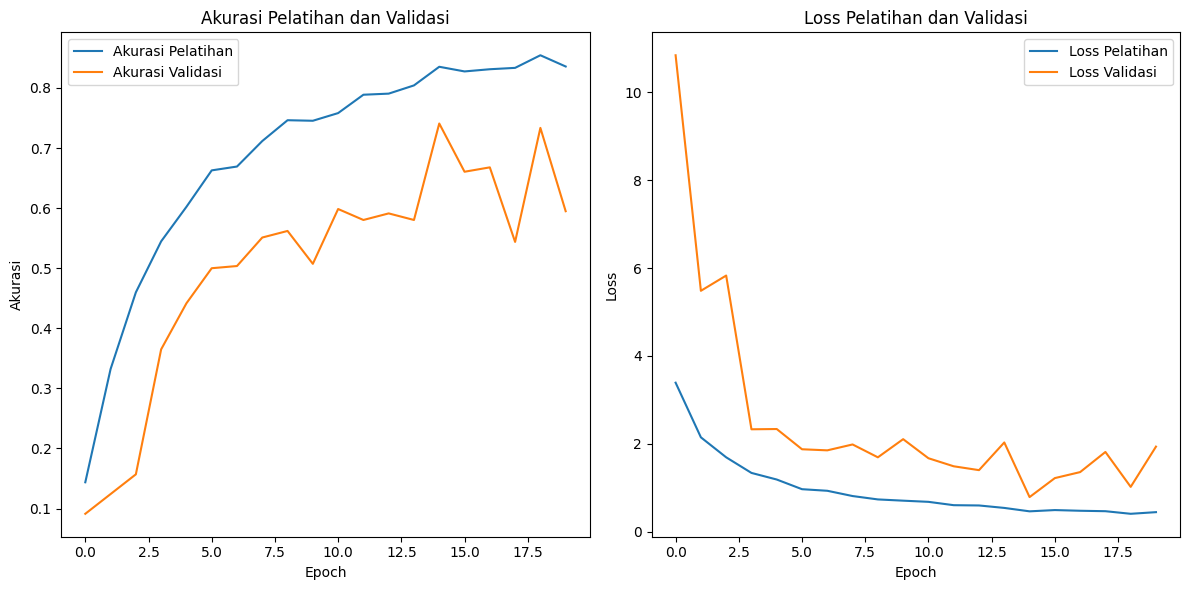

In [9]:
# Ekstrak riwayat pelatihan
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot akurasi dan loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Akurasi Pelatihan')
plt.plot(val_accuracy, label='Akurasi Validasi')
plt.title('Akurasi Pelatihan dan Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Loss Pelatihan')
plt.plot(val_loss, label='Loss Validasi')
plt.title('Loss Pelatihan dan Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

18/18 ━━━━━━━━━━━━━━━━━━━━ 146s 8s/step
Confusion Matrix
[[3 1 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 4]]
Akurasi: 0.7391
Recall: 0.7365
Presisi: 0.8113
Skor F1: 0.7340

Laporan Klasifikasi:

                                               precision    recall  f1-score   support

                                  Anthracnose       0.43      0.60      0.50         5
                                     Bacteria       0.57      0.80      0.67         5
                          Bacterial Leaf Spot       1.00      0.80      0.89         5
                               Bacterial Wilt       1.00      0.60      0.75         5
                              BacterialBlight       1.00      1.00      1.00         5
                                    Belly Rot       1.00      0.60      0.75         5
                                  Bercak_Daun       0.86      1.00      0.92         6
                                    Blac

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

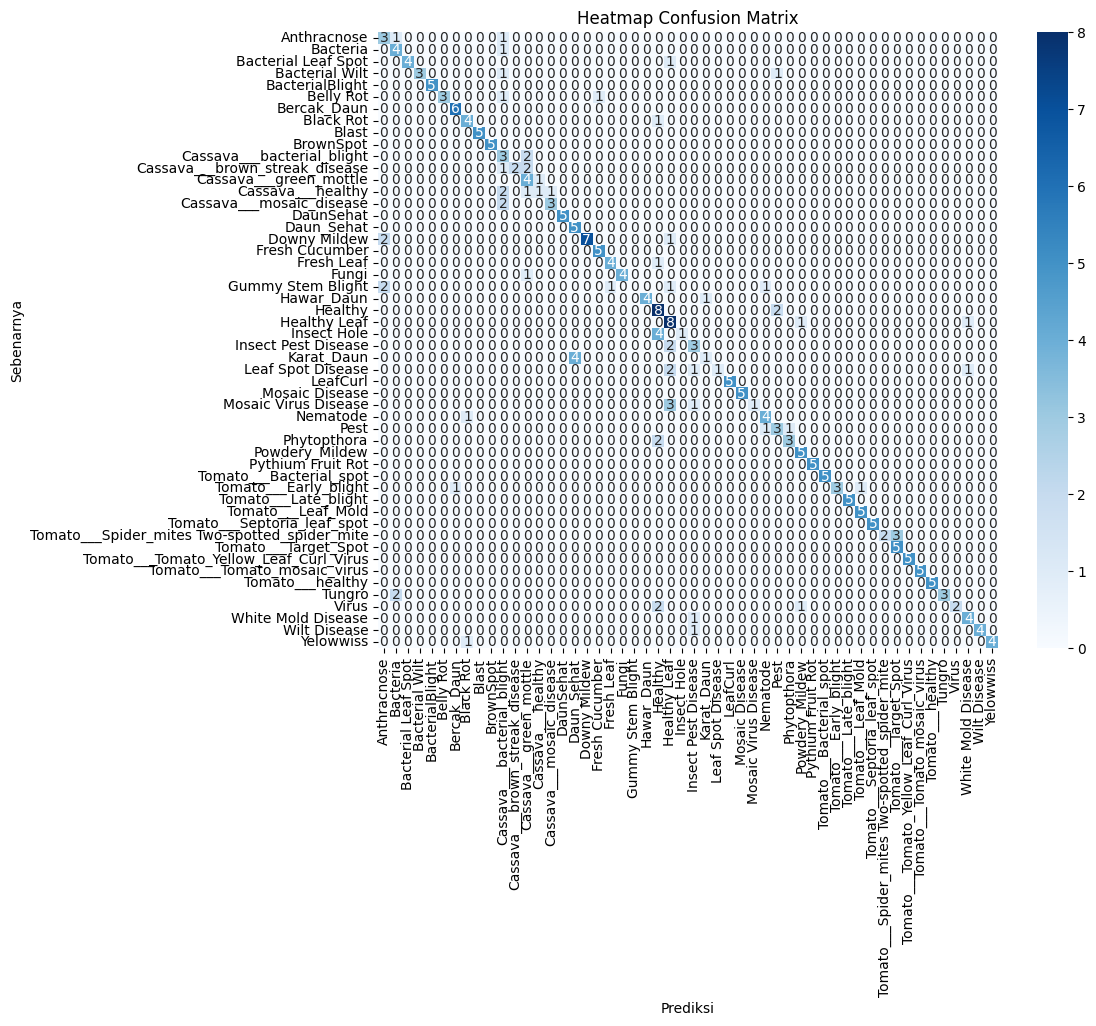

In [10]:
# Evaluasi model
test_generator.reset()
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print('Confusion Matrix')
print(conf_matrix)

# Metrik evaluasi
accuracy = accuracy_score(true_classes, predicted_classes)
recall = recall_score(true_classes, predicted_classes, average='macro')
precision = precision_score(true_classes, predicted_classes, average='macro')
f1 = f1_score(true_classes, predicted_classes, average='macro')

print(f'Akurasi: {accuracy:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Presisi: {precision:.4f}')
print(f'Skor F1: {f1:.4f}')

# Laporan klasifikasi
print('\nLaporan Klasifikasi:\n')
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Heatmap confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Prediksi')
plt.ylabel('Sebenarnya')
plt.title('Heatmap Confusion Matrix')
plt.show()

In [11]:
# Simpan Model
model_save_path = 'content/drive/MyDrive/model/resnet50_model.h5'
model.save(model_save_path)
print(f"Model disimpan ke :{model_save_path}")

Model disimpan ke :content/drive/MyDrive/model/resnet50_model.h5


In [12]:
import pickle

# Ambil label map dari generator
label_map = train_generator.class_indices

# Simpan ke file.pkl
with open('content/drive/MyDrive/model/label_map.pkl', 'wb') as file:
    pickle.dump(label_map, file)

print("Label_map berhasil disimpan")

Label_map berhasil disimpan
